# ConSciScanner - Readability in Py27

This notebook should be run in a Python 2 environment.

It also assumes 'textstat' is installed, which can be done with:

$ pip install textstat

In [29]:
%matplotlib inline

import os

import matplotlib.pyplot as plt

# Import textstat
from textstat.textstat import textstatistics

# Import custom code
from consc.data import load_folder

In [2]:
# Add paths for custom code & data
base_path = os.path.dirname(os.getcwd())
dat_path = os.path.join(base_path, 'Data')

In [17]:
# Set term to analyze
current_term = 'optogenetics'

# Load the data
paper_dat = load_folder('Papers', current_term, dat_path)
press_dat = load_folder('PRs', current_term, dat_path)

In [5]:
# Initialize textstat object
ts = textstatistics()

In [6]:
# Set an index to test run analysis on
ind = 5

In [7]:
print('Syllable Count:')
print(ts.syllable_count(paper_dat[ind].text))
print(ts.syllable_count(press_dat[ind].text))

Syllable Count:
332
1396


In [8]:
print('Flesh-Kincaid Ease:')
print(ts.flesch_reading_ease(paper_dat[ind].text))
print(ts.flesch_reading_ease(press_dat[ind].text))

Flesh-Kincaid Ease:
20.72
22.34


In [9]:
print('Flesh-Kincaid Grade:')
print(ts.flesch_kincaid_grade(paper_dat[ind].text))
print(ts.flesch_kincaid_grade(press_dat[ind].text))

Flesh-Kincaid Grade:
16.6
16.0


In [10]:
print('Automated Readability Index:')
print(ts.automated_readability_index(paper_dat[ind].text))
print(ts.automated_readability_index(press_dat[ind].text))

Automated Readability Index:
19.6
18.7


In [11]:
print('Coleman Liau Index:')
print(ts.coleman_liau_index(paper_dat[ind].text))
print(ts.coleman_liau_index(press_dat[ind].text))

Coleman Liau Index:
18.11
17.99


In [12]:
print('Dale Chall Readability Score:')
print(ts.dale_chall_readability_score(paper_dat[ind].text))
print(ts.dale_chall_readability_score(press_dat[ind].text))

Dale Chall Readability Score:
11.19
9.72


In [13]:
print('Gunning Fog:')
print(ts.gunning_fog(paper_dat[ind].text))
print(ts.gunning_fog(press_dat[ind].text))

Gunning Fog:
28.0
23.8198930481


In [14]:
print('Smog Index:')
print(ts.smog_index(paper_dat[ind].text))
print(ts.smog_index(press_dat[ind].text))

Smog Index:
17.1
17.1


In [15]:
print('Linsear Write Formula:')
print(ts.linsear_write_formula(paper_dat[ind].text))
print(ts.linsear_write_formula(press_dat[ind].text))

Linsear Write Formula:
12.0
12.8


In [16]:
print('Consensus measure (text-standard):')
print(ts.text_standard(paper_dat[ind].text))
print(ts.text_standard(press_dat[ind].text))

Consensus measure (text-standard):
16th and 17th grade
17th and 18th grade


In [18]:
import numpy as np

In [19]:
np.save?

In [57]:
scripts_path = '/Users/tom/Documents/GitCode/Confidence_Scanner/scripts/'
res_path = '/Users/tom/Documents/GitCode/Confidence_Scanner/scripts/results/'

In [58]:
with open(os.path.join(scripts_path, 'terms.txt'), 'r') as terms_file:
    TERMS = terms_file.read().splitlines()

In [69]:
meas = 'ar'
for term in TERMS:
    d1 = np.load(os.path.join(res_path, term +  '_' + meas + '_papers.npy'))
    d2 = np.load(os.path.join(res_path, term +  '_' + meas + '_press.npy'))
    
    print term, '\n\t', ttest_ind(d1, d2)
#     plt.figure()
#     plt.hist(d1, alpha=0.5);
#     plt.hist(d2, alpha=0.5);

autism 
	Ttest_indResult(statistic=4.9223738167769575, pvalue=9.6658235110509902e-07)
cognition 
	Ttest_indResult(statistic=5.6111718093014646, pvalue=2.4487389242729554e-08)
consciousness 
	Ttest_indResult(statistic=0.32926276420775341, pvalue=0.74202383220437962)
dementia 
	Ttest_indResult(statistic=1.2864528426010167, pvalue=0.19851098898620934)
diabetes 
	Ttest_indResult(statistic=-7.4667183634819319, pvalue=1.1188876319226309e-13)
epilepsy 
	Ttest_indResult(statistic=2.445728259901617, pvalue=0.014615212648374653)
hypertension 
	Ttest_indResult(statistic=-5.0917652856513618, pvalue=4.094874511567631e-07)
optogenetics 
	Ttest_indResult(statistic=6.7935918737002376, pvalue=2.4510943280399383e-11)
perception 
	Ttest_indResult(statistic=2.024350850229002, pvalue=0.043091361509894885)
stroke 
	Ttest_indResult(statistic=-7.0013047481808526, pvalue=3.4531671764364673e-12)
vaccines 
	Ttest_indResult(statistic=6.0187530221426666, pvalue=2.2339675871675042e-09)


In [70]:
term = 'vaccines'
meas = 'ar'
d1 = np.load(res_path + term +  '_' + meas + '_papers.npy')
d2 = np.load(res_path + term +  '_' + meas + '_press.npy')

In [72]:
print(np.mean(d1))
print(np.mean(d2))

17.6593132154
16.5530434783


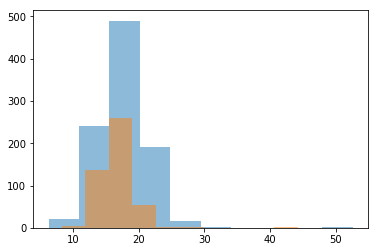

In [71]:
plt.hist(d1, alpha=0.5);
plt.hist(d2, alpha=0.5);

In [35]:
from scipy.stats import ttest_ind

In [36]:
ttest_ind(d1, d2)

Ttest_indResult(statistic=6.9260580781303362, pvalue=6.5398842854581966e-12)

### Data using dataframes

In [130]:
import pandas as pd

In [133]:
df_prs = pd.read_csv(os.path.join(scripts_path, 'results', 'PRs_readability.csv'))
df_pap = pd.read_csv(os.path.join(scripts_path, 'results', 'Papers_readability.csv'))

In [135]:
df_prs.head()

,term,fk,smog,consen,ar
0,vaccines,11.5,14.1,14th and 15th grade,14.7
1,vaccines,16.4,16.6,16th and 17th grade,18.8
2,vaccines,14.0,16.0,17th and 18th grade,17.7
3,vaccines,13.3,14.0,15th and 16th grade,16.4
4,vaccines,14.8,15.9,17th and 18th grade,17.3


In [136]:
df_prs.groupby('term').mean()

,fk,smog,ar
term,,,
autism,13.894753,15.287037,17.039198
vaccines,13.428913,14.900000,16.553043


In [137]:
df_pap.groupby('term').mean()

,fk,smog,ar
term,,,
autism,14.839226,16.020816,18.008159
vaccines,14.464516,15.854735,17.659313


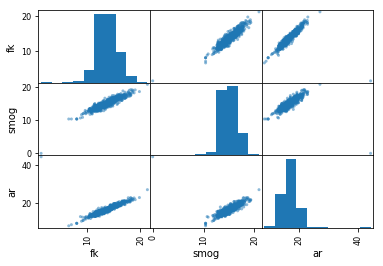

In [138]:
# Check plots of results
pd.plotting.scatter_matrix(df_prs[['fk', 'smog', 'ar']]);

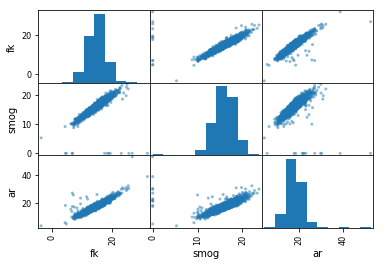

In [139]:
# Check plots of results
pd.plotting.scatter_matrix(df_pap[['fk', 'smog', 'ar']]);

In [140]:
# Check the correlations
corrs = df_prs[['fk', 'smog', 'ar']].corr()
print(corrs)

            fk      smog        ar
fk    1.000000  0.922857  0.767042
smog  0.922857  1.000000  0.639938
ar    0.767042  0.639938  1.000000


In [141]:
# Check the correlations
corrs = df_pap[['fk', 'smog', 'ar']].corr()
print(corrs)

            fk      smog        ar
fk    1.000000  0.771774  0.909872
smog  0.771774  1.000000  0.640153
ar    0.909872  0.640153  1.000000
